![title](http://www.developer.com/imagesvr_ce/1569/ML2.png)

Sometimes, your model in machine learning will not perform well, even with good $\theta$  parameters. This is because of several factors that we are going to study in this notebook. Let's start with the first one:

## Overfitting and underfitting

To explain the concept of over and underfitting, let's dive straight into the cars dataset that we have used previously. Let's try to visualize the relationship between the miles per galon column, and some of the continous variables of the dataset.

In [19]:
import pandas as pd
cars = pd.read_csv("cars2.csv")
cars = cars.dropna()
cars.shape

C:\Users\juan9\Anaconda3Fix\lib\site-packages\pandas\core\ops.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison

In [10]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


To plot the scatter correlations, let's plot a scatter matrix plot.

C:\Users\juan9\Anaconda3Fix\lib\site-packages\ipykernel\__main__.py:17: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.


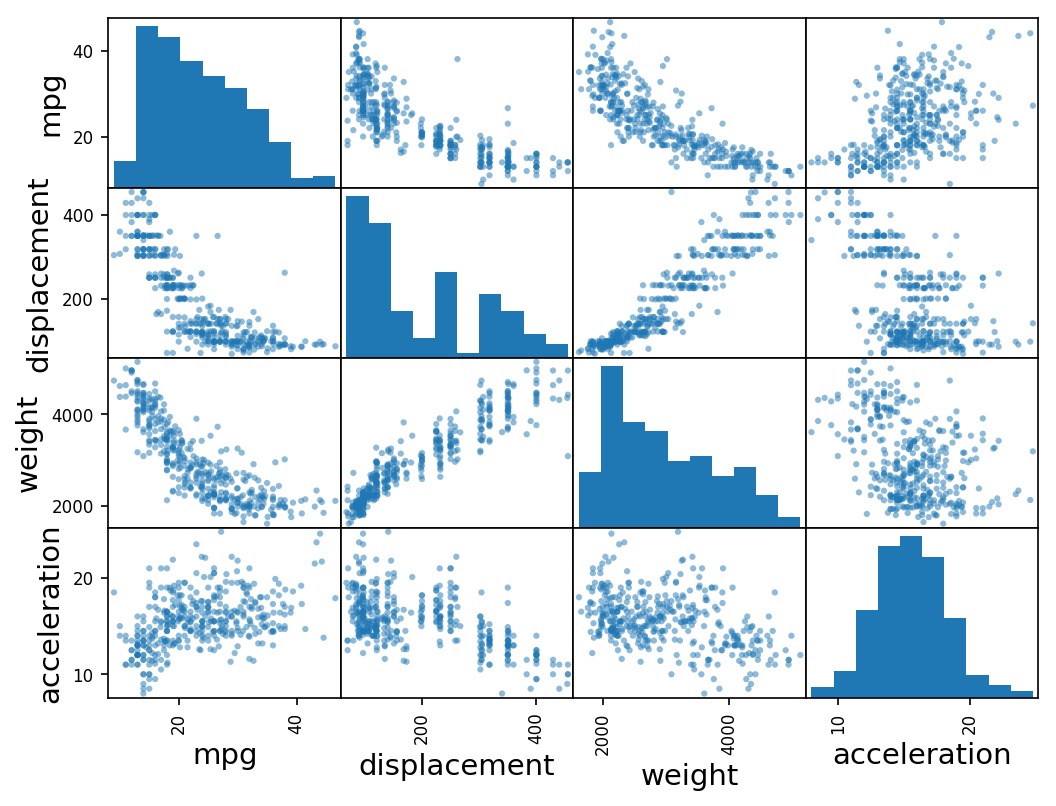

In [11]:
import matplotlib.pyplot as plt
from matplotlib import rcParams 
from pandas.tools.plotting import scatter_matrix #Library for plotting scatter matrices with pandas.


#Our usual Parameter function.
def MatplotLib_Params():
    #The size of the figure.
    rcParams['figure.figsize'] = (8, 6)
    #Dots per inch or resolution of the figure.
    rcParams['figure.dpi'] = 150
    #Size of the letters and numbers in the plot.
    rcParams['font.size'] = 14
    
MatplotLib_Params()
cont = cars[["mpg","displacement","horsepower","weight","acceleration"]]
ax = scatter_matrix(cont)
plt.show()

In the first row, the one related to the relationship between mpg and the other columns, we see that two variables are positively correlated with mpg and two are negatively correlated. Let's take a closer look at the relationship between weight and mpg.

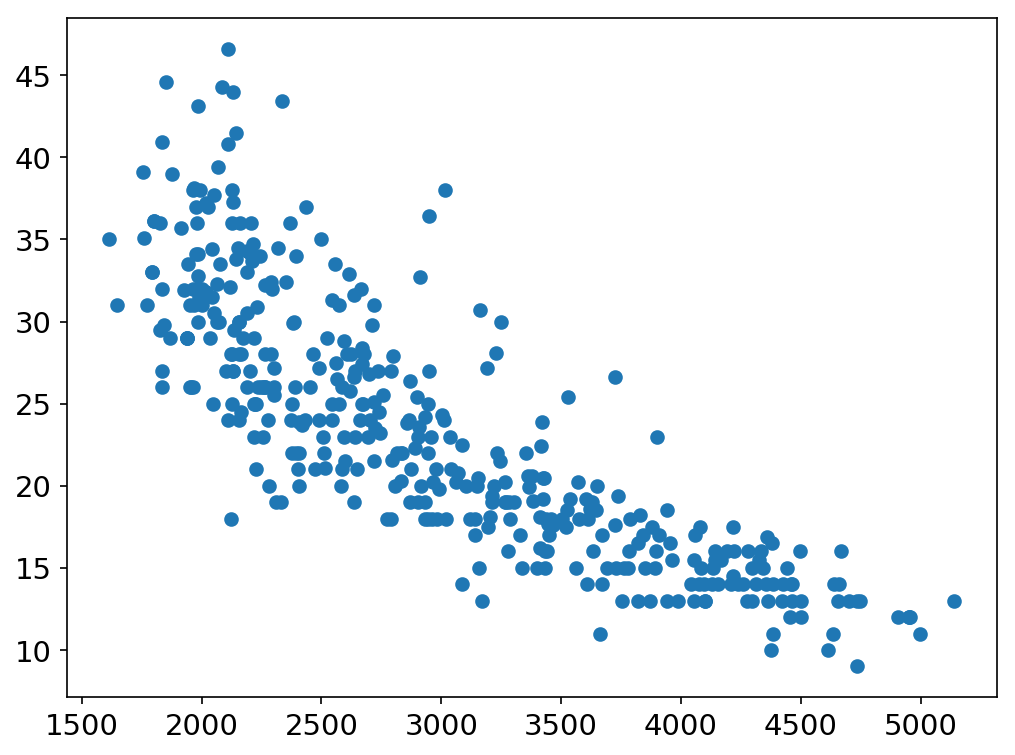

In [12]:
plt.scatter(cars.weight,cars.mpg)
plt.show()

If we watch closely, if we tried to plot a line through the data, like in linear regression, we would be missing quite a few data points.

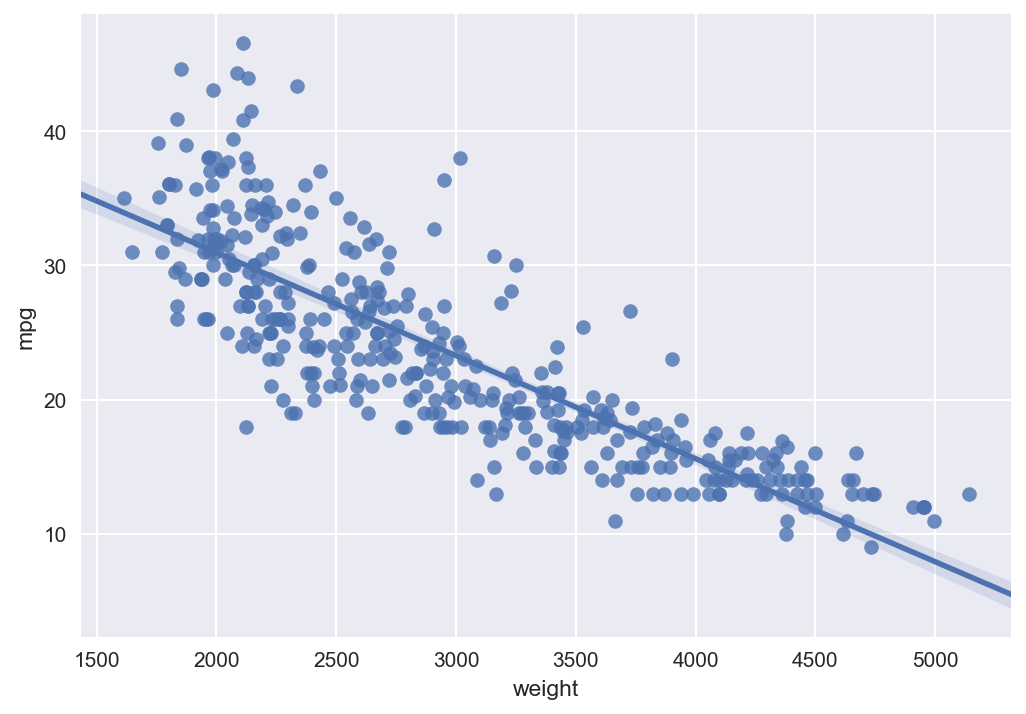

In [13]:
import  seaborn as sns

ax = sns.regplot(x = "weight", y = "mpg", data = cars)
plt.show()

If we use polynomial features, then the inverse is true. Now we are fitting too closely  the dataset, and the model won't generalize well.

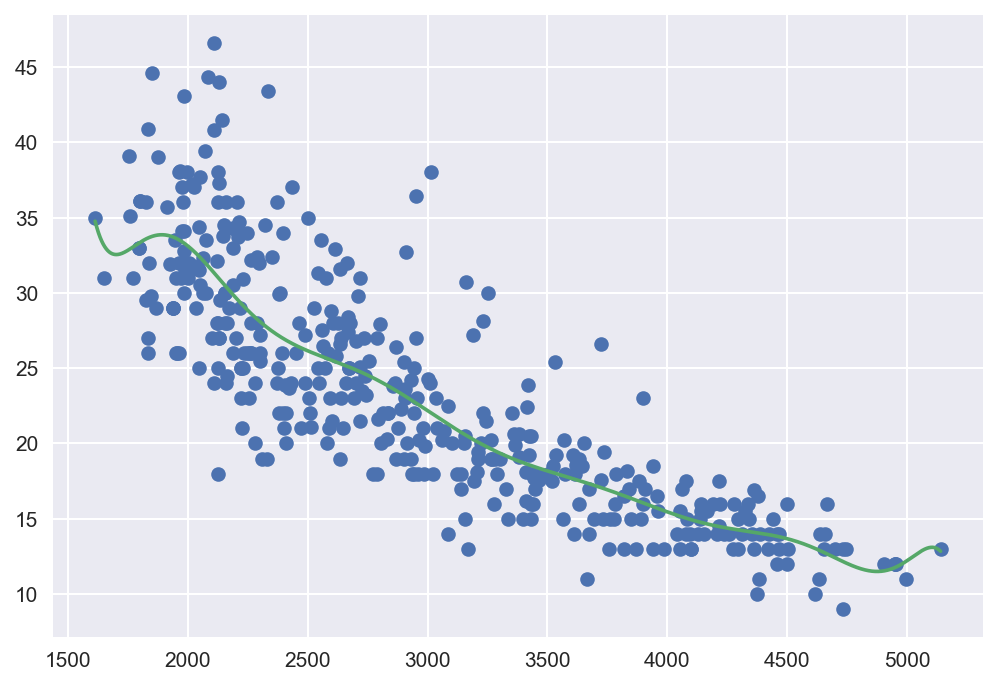

In [14]:
import numpy as np

z = np.polyfit(cars.weight,cars.mpg,12)
f = np.poly1d(z)

w_new = np.linspace(min(cars.weight),max(cars.weight),5000)
mpg_new = f(w_new)

plt.plot(cars.weight,cars.mpg,'o', w_new, mpg_new)
plt.show()

For the model to generalize well, we need to find the function that fits the data **just right**. 

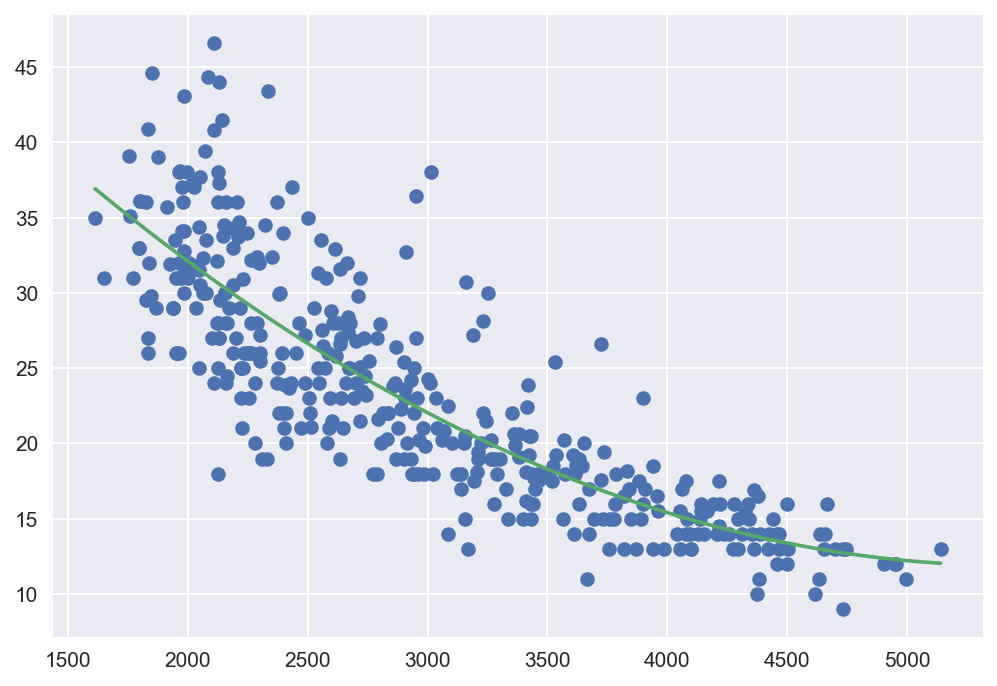

In [16]:
z = np.polyfit(cars.weight,cars.mpg,2)
f = np.poly1d(z)

w_new = np.linspace(min(cars.weight),max(cars.weight),5000)
mpg_new = f(w_new)

plt.plot(cars.weight,cars.mpg,'o', w_new, mpg_new)
plt.show()

While it's still not perfect, it does better than the other two in most situations. It **predicts** well enough that it's better than just random guessing and it **generalizes** well enough that it can predict new values with some certainty. 

But the best way identify when the model is performing poorly is by using a **test set**. The test set will have the target prediction variable removed, and the trained model will be scored against the test set. To create a test set, we split the data randomly, with most of the data being on the training set. We can use scikit learn to do this easily without having to code it ourselves.

In [18]:
def Normalize(cont):
    mean = cont.mean()
    std = cont.std()
    return (cont - mean)/std

#Create a dataframe with only the continous variables.
cars_cont = cars.drop(["model_year","name","origin","cylinders"],axis = 1)

#Normalize all variables.
for column in cars_cont.columns:
    cars_cont[column] = Normalize(cars_cont[column])

#Replace the columns in the old cars dataframe. There's a simpler way to do all this by checking the data type of the column.
cars[cars_cont.columns] = cars_cont
cars.head()

TypeError: Could not convert 13016515015014019822021522519017016015022595959785884687909511390215200210193889095?1001051008810016517515315018017017511072100888690707665696070958054908616517515015315020815516019097150130140150112768769869297808817515014513715019815015815021522517510510010088954615016717018010088729490851079014523049759111215011012218095?100100678065751001101051401501501401508367785261757575979367951057272170145150148110105110951101101297583100789671979770909588981155386819279831401501201521001058190526070531007811095717075721021508810812018014513015068805896701451101451301101051009818017019014978887589638367789711011048665270601101401391059585881009010585110120145165139140689597759510585971031251151337168115858890110130129138135155142125150716580807712571907070656990115115907660706590889090789075927565105654848676767?676213210088?72848492110845864606765626863656574?7575100748076116120110105888588888885849092?746868637088757067676711085921129684908652847982 to numeric

In [189]:
from sklearn.model_selection import train_test_split

#Split the dataset into train and test.
X_train,X_test,y_train,y_test = train_test_split(cars.drop(["mpg"],axis = 1),cars.mpg, 
                                                 test_size = 0.23, random_state = 42 )


X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin
115,8,0.993972,0.826460,1.382882,-0.883422,76,1
219,6,-0.503431,0.323798,-0.102343,-0.580913,81,3
73,8,1.116401,1.077791,0.439735,-1.639696,73,1
136,8,0.993972,0.952125,0.995683,-1.072491,77,1
95,8,1.888647,1.580453,1.906466,-1.450628,75,1


Now, we can try using linear regression to see the different test errors of different models.

In [190]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#Alternatively, we can set sklearn to normalize the features while fitting.
#It won't have any effect here, since we already normalized. 
right_model = LinearRegression(fit_intercept = False,normalize = True)
right_model.fit(X_train,y_train)

print("underfit train model score: " + str(right_model.score(X_train,y_train)))
print("underfit test model score: " + str(right_model.score(X_test,y_test)))


over_model = LinearRegression(fit_intercept = False)
Poly = PolynomialFeatures(4)
polyX_train = Poly.fit_transform(X_train.drop(["cylinders","year","origin"],axis = 1))
polyX_test = Poly.fit_transform(X_test.drop(["cylinders","year","origin"],axis = 1))

polyX_train = np.c_[polyX_train,X_train[["cylinders","year","origin"]].values]
polyX_test= np.c_[polyX_test,X_test[["cylinders","year","origin"]].values]

over_model.fit(polyX_train,y_train)
print("overfit train model score: " + str(over_model.score(polyX_train,y_train)))
print("overfit test model score: " + str(over_model.score(polyX_test,y_test)))


almost_model = LinearRegression(fit_intercept = False)
Poly = PolynomialFeatures(2)
polyX_train = Poly.fit_transform(X_train.drop(["cylinders","year","origin"],axis = 1))
polyX_test = Poly.fit_transform(X_test.drop(["cylinders","year","origin"],axis = 1))

polyX_train = np.c_[polyX_train,X_train[["cylinders","year","origin"]].values]
polyX_test= np.c_[polyX_test,X_test[["cylinders","year","origin"]].values]

almost_model.fit(polyX_train,y_train)
print("Almost good model train score: " + str(almost_model.score(polyX_train,y_train)))
print("Almost good model test score: " + str(almost_model.score(polyX_test,y_test)))



underfit train model score: 0.774595182898
underfit test model score: 0.715290940891
overfit train model score: 0.940362423743
overfit test model score: -1.59813901672
Almost good model train score: 0.885440756441
Almost good model test score: 0.816200505417


As we can observe, the underfit model has low score all around, the overfit model has great training score but horrible testing score, and the almost good model is overall better but still overfits a bit, so there's a gap between testing a training score. 

Another way to visualize this relationship is the **learning curve**. This shows us how the training and test errors differ while the model receives more data. An underfit model will not improve much with more data, but an overfit model will!

In [191]:
from sklearn.model_selection import learning_curve

#Taken from the sklearn documentation.
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



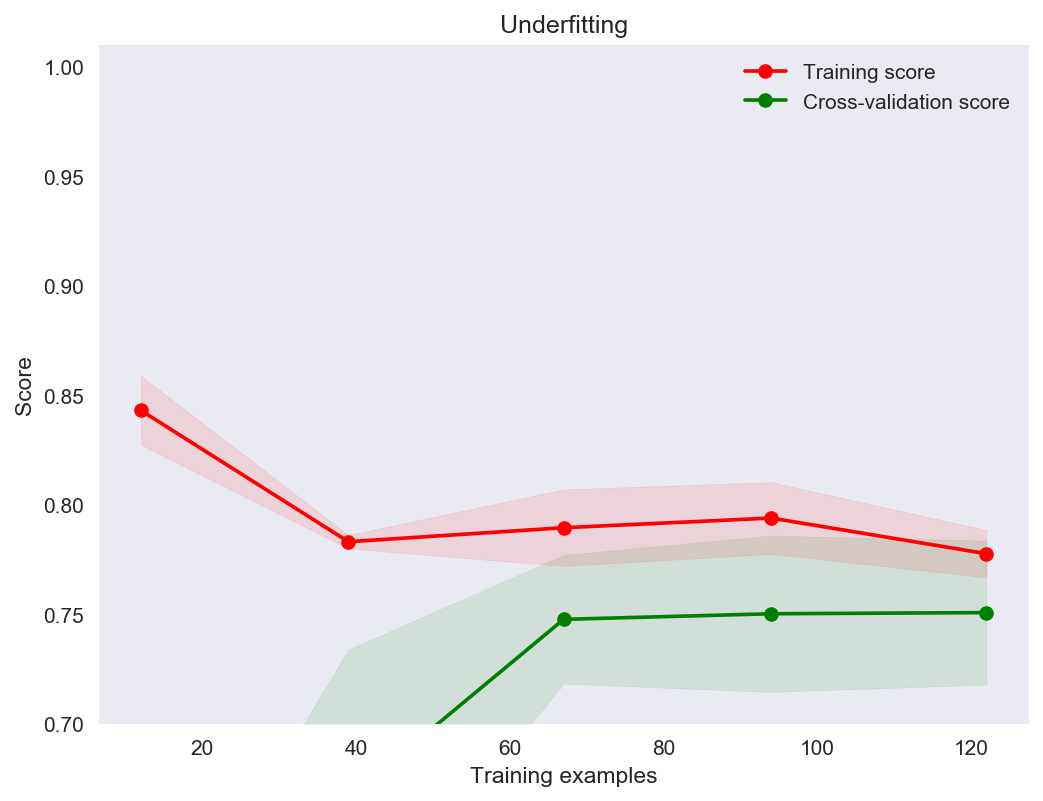

In [192]:
plot_learning_curve(right_model, "Underfitting", X_train, y_train, ylim=(0.7, 1.01))
plt.show()

In an underfitting model, model performance doesn't increase very well as the training examples increase. At one point, testing and training score will converge, in an undesired performance score.

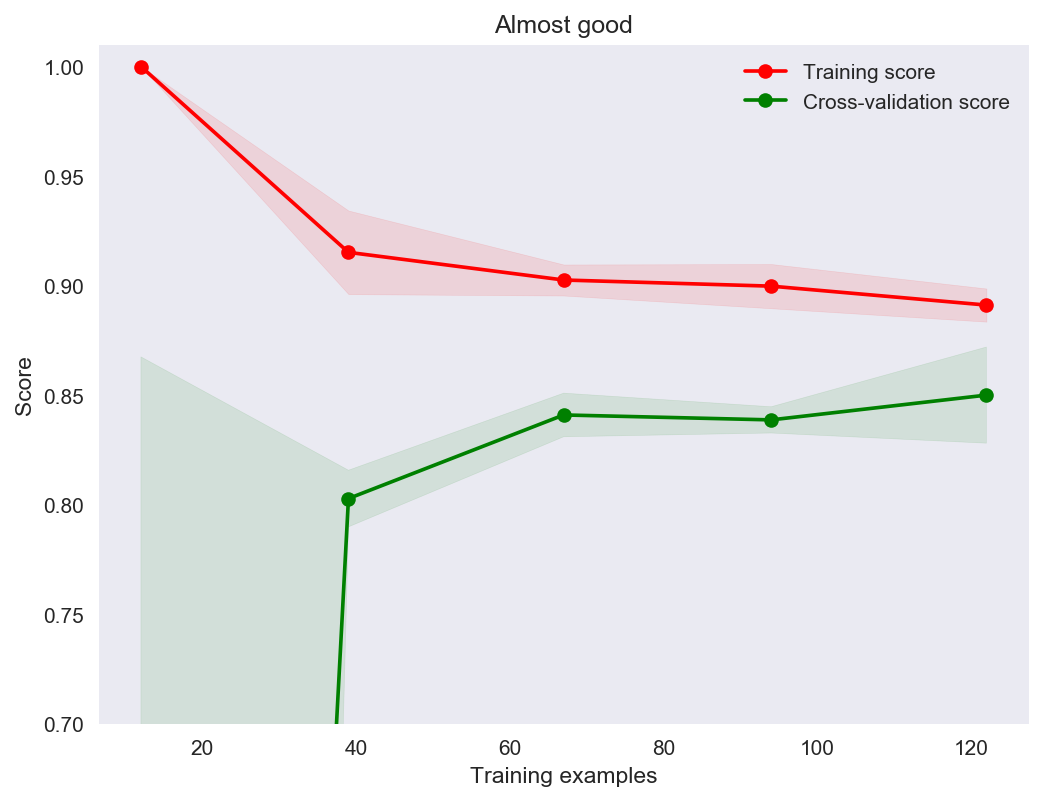

In [193]:
plot_learning_curve(almost_model, "Almost good", polyX_train, y_train, ylim=(0.7, 1.01))
plt.show()

In this case, there's a gap between the training score and the test score, but with a higher score overall than the underfitting model. When there's a gap like this, the model is **overfitting**, though this one is on it's way towards improvement. The general state of the curve is that the training score is decreasing as more data is introduced but the test score is increasing with more training examples. This is one way to combat overfitting, by adding more data. 


Ways to combat underfitting:

- Improve the model parameters.
- Use a different model. 
- Add more features/columns.


Ways to combat overfitting:

- Add more data.
- Decrease the number of features/columns.
- Improve the model parameters.
- Add regularization weights.


And what are regularization weights? 

### Regularization

When training a machine learning model, if the model is very complex with a large number of features, it may be too complex for it's own good and not generalize well with new  unseen data. This is because there may be **noise** in the data, irregularities that are not part of the norm of the data. However, since the model is very complex, it may assume that the noise is actually part of the data, and as such, it will not perform well if future data isn't as noisy as the training one. So how do we reduce this complexity? Aside from the earlier methods I mentioned, one common technique is  **regularization**. 

Regularization prevents the model from learning itself too well, by penalizing the loss function while training, depending on the values of the parameters. This  value is also added when performing gradient descent. For logistic regression:


$Cost: J(\theta) = \frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big) + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}$

$Gradient: \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m} X^T(g(X\theta)-y) + \frac{\lambda}{m}\theta_{j}$


Where $\frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}$ is the regularization term that is added to the cost function and $\lambda$ is the regularization weight. The higher the value of $\lambda$, the heavier the weight imposed on the model. However, for values that are too high, the model may underfit. On every step of Gradient Descent, the parameters are updated in a different way than regular Gradient Descent, with the regularization weights being added. This punishes high values for the parameters, thus being less prone to overfit.

The functions for regularization include **L1 (LASSO), L2 (Ridge), L1L2 (ElasticNet)**  and others. I'll leave it to you to investigate more about the theory behind them. Let's see them in action on scikit-learn:

In [194]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

lasso = Lasso(0.1)
lasso.fit(polyX_train,y_train)

ridge = Ridge(1)
ridge.fit(polyX_train,y_train)

eNet = ElasticNet(0.1,0.7)
eNet.fit(polyX_train,y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

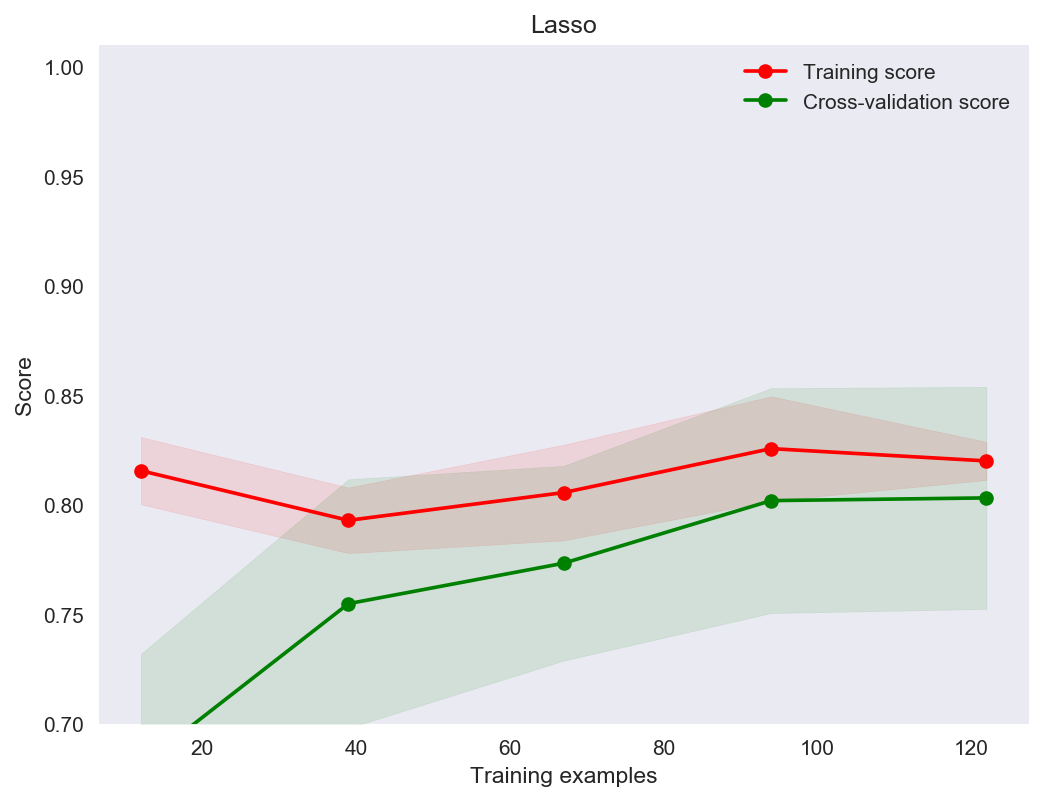

In [195]:
plot_learning_curve(lasso, "Lasso", polyX_train, y_train, ylim=(0.7, 1.01))
plt.show()

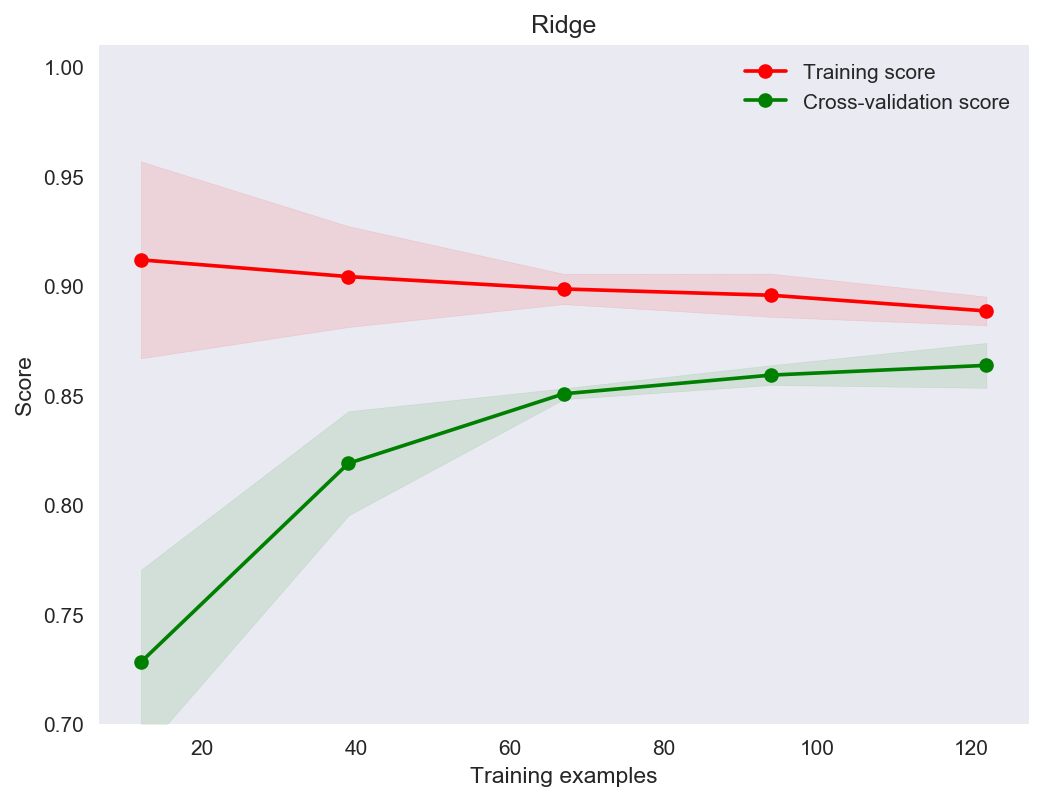

In [196]:
plot_learning_curve(ridge, "Ridge", polyX_train, y_train, ylim=(0.7, 1.01))
plt.show()

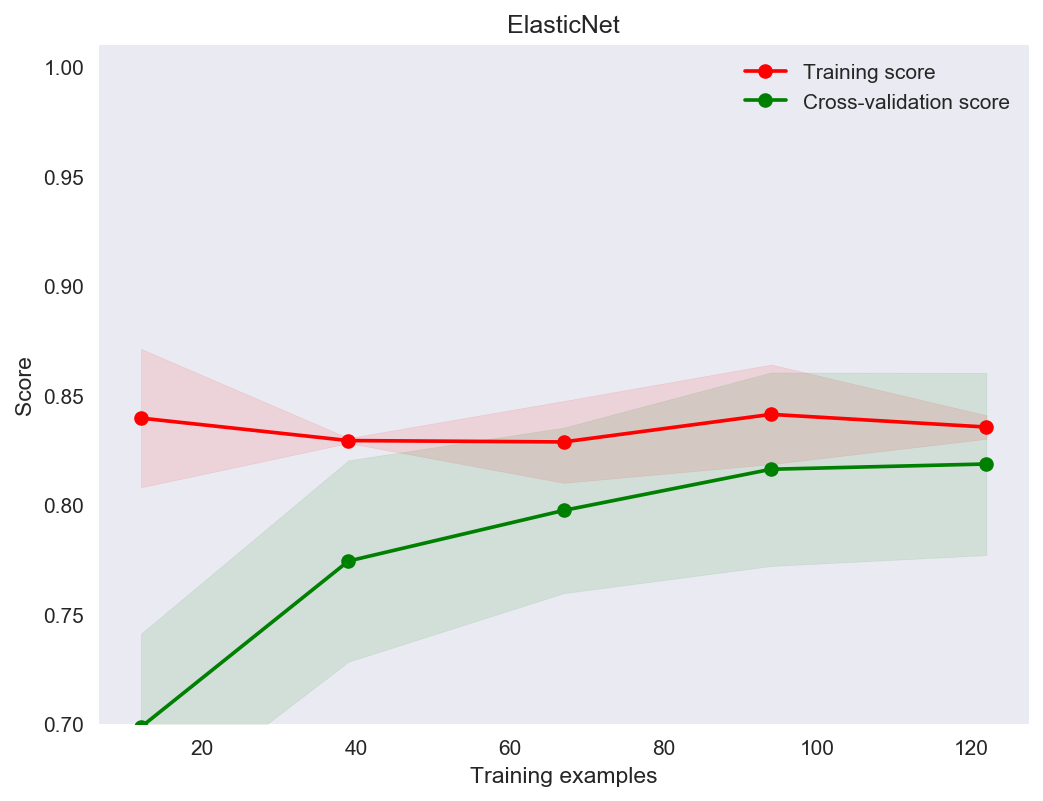

In [197]:
plot_learning_curve(eNet, "ElasticNet", polyX_train, y_train, ylim=(0.7, 1.01))
plt.show()

Out of the three, ridge regression works best with the 2nd order polynomial model we created earlier. As a rule of thumb of when to use each one of these regularizations:

- Use LASSO if you want the model to perform variable selection without removing some features. 

- Use Ridge if you want the model to use only some features.

- Use ElasticNet if you have some highly correlated variables.



## Hyperparameter search optimization

So far, when we adjusted the learning rate or lambda or any other parameter, we had to do so manually, until we achieved acceptable results. For models with a huge amount of parameters, this isn't feasible at all, since most of these parameters are continous variables, which can take infinite values. A good strategy to optimize these hyperparameters, is to train the model iteratively with different parameters, and keep the one that produces the best results when testing. However, for very large datasets, which can take a long time if the test set is of  a a large size. One solution to this is to use a **validation** dataset, that would be a "mini test set", which would test the score of the model with a specific set of parameters.

However, this process still isn't perfect. If the model fits  on its constant validation set, but performs poorly on test, then the model in general would perform poorly. But if we constantly change the validation set, based on the training data, then that would ensure that the model generalizes well with a lot of different data. This is the process of **K-fold Cross Validation**. For example:

- Randomly shuffle the full dataset.

- Split the data into training (75%) and test sets(25%).

- Split the training set into 5 parts of equal size. 

- Perform training with 4 parts and validate with the other. 

- Switch one of the 4 parts with the current validation set and validate again.

- Do this until all 5 parts have been used on validation, and get the average score of the model parameters. 

- Change the model parameters until the parameters with the highest score is obtained.

- Test the model against test data. 


In this example, K = 5, so we cross validated with 5 folds of data. To perform this procedure, we could code it all in Python, using some loops and calculations. But for the purposes of this notebook, let's use some of the built-in functions that scikit-learn has for this.

In [198]:
# First, let's see which parameters we can use from a model.

eCV = ElasticNet()
eCV.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

#### Grid Search

On Grid search, we give the model a list of parameters and the ranges of values that each parameter can take. The model then performs training on every possible combination of parameters, and keeps the parameters  that got the best results. 

In [199]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore") # A lot of warnings may be thrown when cross validating, so turn them off if they bother you.


#The different parameter combinations
grid_params = {
    'alpha': [0.01,0.1,1.0,10,100],
    'fit_intercept':[False,True],
    'l1_ratio':[0.25,0.5,0.75],
    'max_iter':[500,1000,1500,2000]
}

#The grid search elastic net model. cv stands for the amount of folds in cross validation.
grid_eNet = GridSearchCV(eCV,grid_params,cv = 5)
grid_eNet.fit(polyX_train,y_train)

print(grid_eNet.best_params_)

{'alpha': 0.01, 'fit_intercept': True, 'l1_ratio': 0.25, 'max_iter': 500}


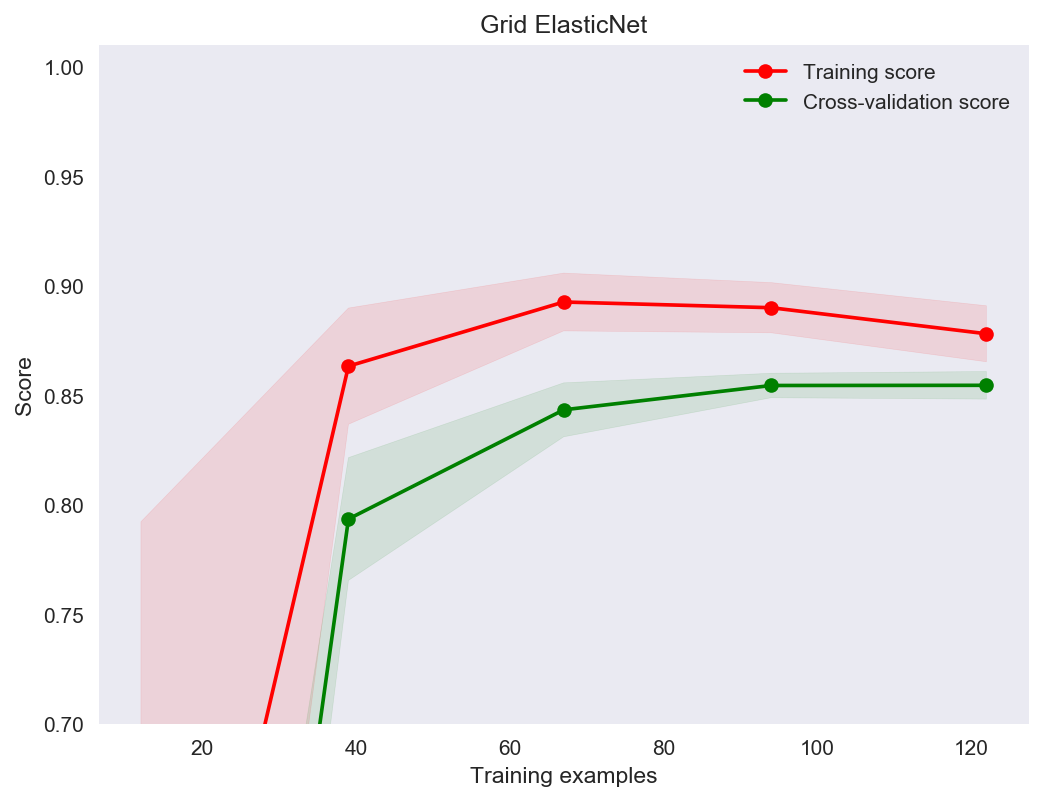

In [200]:
plot_learning_curve(grid_eNet, "Grid ElasticNet", polyX_train, y_train, ylim=(0.7, 1.01))
plt.show()

This one performed better than the regular Elastic Net we used earlier. The Grid Search is the same type of object as a sklearn machine learning model, so we can use the same functions as a regular model, like predict, fit, score, etc. 

#### Randomized Search.

On Randomized Search cross validation,  random parameters are picked from a grid, and cross validation is performed as normal with these parameters. The difference between randomized search and grid search is in randomized search you specify the number of times the cross validation is performed instead of using all parameter combinations. Random search is especially helpful when working with continous parameter values. 

In [201]:
import scipy.stats as st # For continous distributions.
from sklearn.model_selection import RandomizedSearchCV

random_params = {
    'alpha':st.expon(scale=0.01),
    'fit_intercept':[False,True],
    'l1_ratio': st.expon(scale=1),
    'max_iter':[500,1000,1500,2000]
}

#Random search model. n_iter stands for the number of parameter combinations that the model will train.
random_eNet = RandomizedSearchCV(eCV,random_params,cv = 5, n_iter = 50)
random_eNet.fit(polyX_train,y_train)

print(random_eNet.best_params_)

{'alpha': 0.013845613783725078, 'fit_intercept': True, 'l1_ratio': 0.022409718013743238, 'max_iter': 1500}


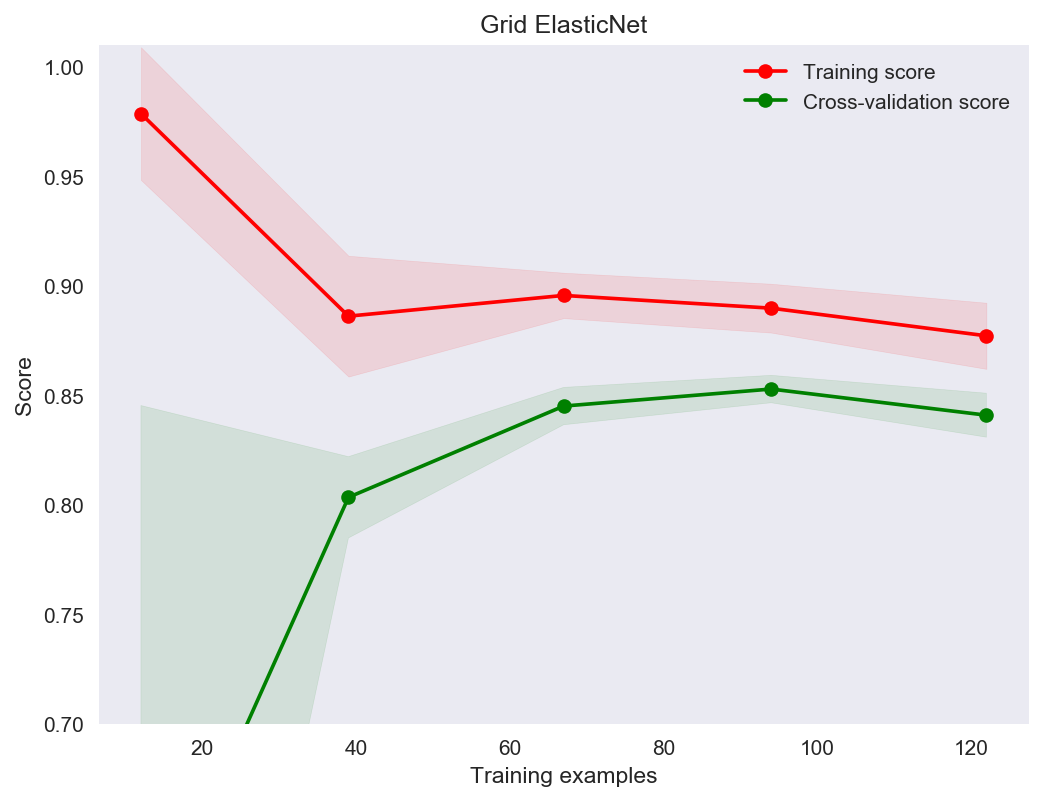

In [202]:
plot_learning_curve(random_eNet, "Random ElasticNet", polyX_train, y_train, ylim=(0.7, 1.01))
plt.show()

Although none of our models gave the most optimal results, we got an idea of what worked best for this particular problem. It's always a good idea to analyze how different models perform on the same problem, to find which one delivers the most optimal solution, based on time and score. 

## Further Reading

Bias-Variance tradeoff: http://scott.fortmann-roe.com/docs/BiasVariance.html

## EXERCISE

Improve the performance of the models of the previous two notebooks!

In [203]:
# Your cells below.